### 回归树
##### 回归决策树主要使用的是CART算法，使用sklearn的tree模块中的DecisionTreeRegressor可以实现回归树，下面使用决策树拟合多标签回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeRegressor

[[ 0.03664435]
 [ 0.04915606]
 [ 0.06166777]
 [ 0.07417948]
 [ 0.0866912 ]
 [ 0.09920291]
 [ 0.11171462]
 [ 0.12422633]
 [ 0.13673805]
 [ 0.14924976]
 [ 0.16176147]
 [ 0.17427318]
 [ 0.18678489]
 [ 0.19929661]
 [ 0.21180832]
 [ 0.22432003]
 [ 0.23683174]
 [ 0.24934345]
 [ 0.26185517]
 [ 0.27436688]
 [ 0.28687859]
 [ 0.2993903 ]
 [ 0.31190202]
 [ 0.32441373]
 [ 0.33692544]
 [ 0.34943715]
 [ 0.36194886]
 [ 0.37446058]
 [ 0.38697229]
 [ 0.399484  ]
 [ 0.41199571]
 [ 0.42450743]
 [ 0.43701914]
 [ 0.44953085]
 [ 0.46204256]
 [ 0.47455427]
 [ 0.48706599]
 [ 0.4995777 ]
 [ 0.51208941]
 [ 0.52460112]
 [ 0.53711283]
 [ 0.54962455]
 [ 0.56213626]
 [ 0.57464797]
 [ 0.58715968]
 [ 0.5996714 ]
 [ 0.61218311]
 [ 0.62469482]
 [ 0.63720653]
 [ 0.64971824]
 [ 0.66222996]
 [ 0.67474167]
 [ 0.68725338]
 [ 0.69976509]
 [ 0.71227681]
 [ 0.72478852]
 [ 0.73730023]
 [ 0.74981194]
 [ 0.76232365]
 [ 0.77483537]
 [ 0.78734708]
 [ 0.79985879]
 [ 0.8123705 ]
 [ 0.82488221]
 [ 0.83739393]
 [ 0.84990564]
 [ 0.86241

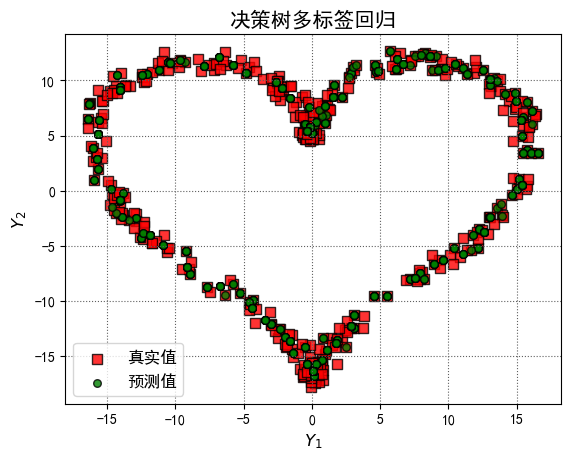

In [10]:
N = 400
x = np.random.rand(N) * 4 * np.pi # [-4, 4)
x.sort()
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N) * 0.5
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + np.random.randn(N) * 0.5
np.set_printoptions(suppress=True)
y = np.vstack((y1, y2)).T
# 转置后，得到N个样本，每个样本都是一维的
x = x.reshape(-1, 1)
deep = 8
# 回归树一般指定MSE作为评估指标
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=deep)
# dt = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=2)
dt.fit(x, y)
x_test = np.linspace(x.min(), x.max(), num=1000).reshape(-1, 1)
print(x_test)
y_hat = dt.predict(x_test)
print(y_hat)
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', edgecolor='k', s=60, label='真实值', alpha=0.8)
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolor='k', s=30, label='预测值', alpha=0.8)
plt.legend(loc='lower left', fancybox=True, fontsize=12)
plt.xlabel('$Y_1$', fontsize=12)
plt.ylabel('$Y_2$', fontsize=12)
plt.grid(True, ls=':', color='#606060')
plt.title('决策树多标签回归', fontsize=15)
plt.show()